# Maun,Isha Kamleshbhai
# 1001-234-805
# 2017-02-07
# Assignment_01_01

Note: As output of one cell goes into next, need to run in order.

Importing Modules

In [300]:
# Module Import
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import numpy as np
from PIL import Image
from skimage import data
import scipy
from ipywidgets import interact, fixed, Checkbox, FloatSlider, IntSlider, FloatRangeSlider, Label


Reading the Cameraman Image and display it as GrayScale

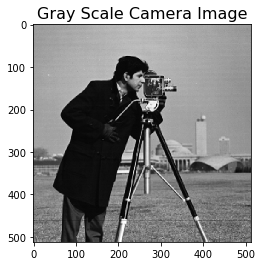

In [301]:
cameraman_image = data.camera()/255.
#print (cameraman_image.shape)
plt.title('Gray Scale Camera Image', size=16)
plt.imshow(cameraman_image,cmap=plt.cm.gray)
plt.show()

Gaussian Smoothing 
#(Used fftconvolve as I was getting memory error when using scipy.ndimage.convolve.)

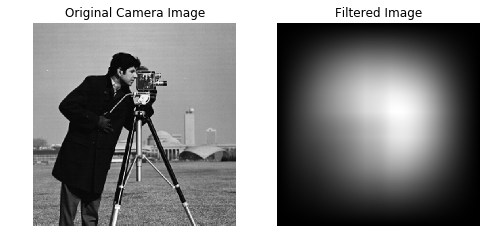

In [302]:
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
def gaussian_kernel(image,sigma,kernel_size):
    X = np.linspace(-kernel_size, kernel_size, 400)
    Y = np.linspace(-kernel_size, kernel_size, 400)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    mu = np.array([0.0, 0.0])
    covariance = np.diag(np.array([sigma, sigma])**2)
    XY = np.column_stack([X.flat, Y.flat])
    z = scipy.stats.multivariate_normal.pdf(XY, mean=mu, cov=covariance)
    Z = z.reshape(X.shape)
    
    kernel_sum=abs(np.sum(Z))
    Z= Z/kernel_sum if kernel_sum else Z
    filtered_image = scipy.signal.fftconvolve(image, Z)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Camera Image')
    image_plot = axes_array[1].imshow(filtered_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Filtered Image')
    plt.show()

current_image = data.camera()/255.
interact(gaussian_kernel,image=fixed(current_image),sigma=FloatSlider(value=5.0, min=0.1, max=10, step=0.1,continuous_update=False),
         kernel_size=IntSlider(value=7, min= 3, max= 10,step=1));


Gaussian Smoothing 
#With the pre-defined function to use the output for next task

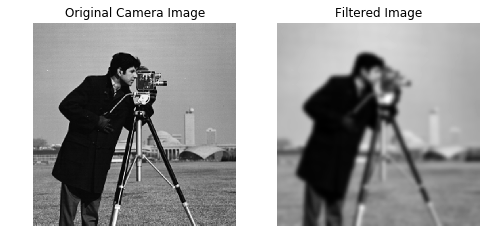

In [303]:
def gaussian_filter_and_display_results(cameraman_image, sigma):
    filtered_image=scipy.ndimage.filters.gaussian_filter(cameraman_image, 
            sigma=sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(cameraman_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original Camera Image')
    image_plot = axes_array[1].imshow(filtered_image,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Filtered Image')
    plt.show()
    #return filtered_image
current_image = data.camera()/255.
#interact(gaussian_kernel,size=IntSlider(min=0, max=10, step=1,continuous_update=False));
interact(gaussian_filter_and_display_results,cameraman_image=fixed(current_image),
         sigma=FloatSlider(value=5.0, min=0.0, max=10, step=0.1,continuous_update=False));
#smoothed_image= gaussian_filter_and_display_results.filtered_image

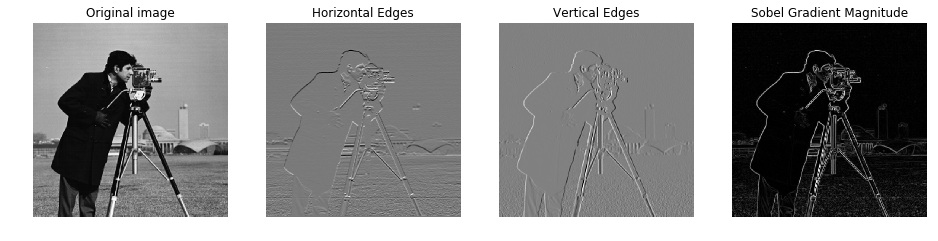

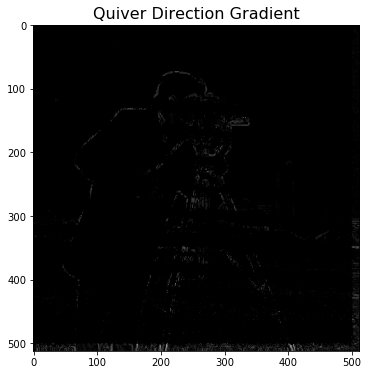

(512, 512)


In [304]:
from scipy.ndimage import convolve
from numpy import ma
plt.rcParams['image.interpolation'] = 'none'
def demo_roberts_operator(image_size,sigma,rotation_angle=0,figure_size=12,display_absolute=False):
    camera_image=data.camera()/255.
    original_image = scipy.ndimage.filters.gaussian_filter(camera_image, 
            sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    original_image[int(image_size):-int(image_size),int(image_size):-int(image_size)]=0
    original_image=scipy.ndimage.rotate(original_image,rotation_angle)
    vertical_kernel = np.array([[ 1.,  2,  1],[ 0,  0,  0],[-1,-2,-1]])
    horizontal_kernel = np.array([[ -1.,  0,  1],[ -2,  0,  2],[-1,0,1]])

    # Normalize the kernels
    kernel_sum=abs(np.sum(horizontal_kernel))
    horizontal_kernel= horizontal_kernel/kernel_sum if kernel_sum else horizontal_kernel
    kernel_sum=abs(np.sum(vertical_kernel))
    vertical_kernel= vertical_kernel/kernel_sum if kernel_sum else vertical_kernel

    horizontal_edge_image = scipy.ndimage.convolve(original_image, vertical_kernel)
    vertical_edge_image = scipy.ndimage.convolve(original_image, horizontal_kernel)
    
    
    #Gradient magnitude
    sobel_magnitude_real  = np.sqrt(horizontal_edge_image * horizontal_edge_image + vertical_edge_image * vertical_edge_image)
    sobel_magnitude = sobel_magnitude_real * 255.0 / np.max(sobel_magnitude_real)
   
    #print(np.shape(sobel_magnitude))
    #print(sobel_magnitude)
    
  
    fig1, axes_array = plt.subplots(1,4)
    fig1.set_size_inches(16,4)
    image_plot = axes_array[0].imshow(original_image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    if display_absolute:
        image_plot = axes_array[1].imshow(np.abs(horizontal_edge_image),cmap=plt.cm.gray) # Show the filtered image
    else:
        image_plot = axes_array[1].imshow(horizontal_edge_image,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Horizontal Edges')
    if display_absolute:
        image_plot = axes_array[2].imshow(np.abs(vertical_edge_image),cmap=plt.cm.gray) # Show the sharpened image
    else:
        image_plot = axes_array[2].imshow(vertical_edge_image,cmap=plt.cm.gray) # Show the sharpened image
    axes_array[2].axis('off')
    axes_array[2].set(title='Vertical Edges')

    image_plot = axes_array[3].imshow(sobel_magnitude,cmap=plt.cm.gray) # Show the filtered image
    axes_array[3].axis('off')
    axes_array[3].set(title='Sobel Gradient Magnitude')
    #image_plot = axes_array[4].imshow(sobel_direction ,cmap=plt.cm.gray) # Show the original image
    #axes_array[4].axis('off')
    #axes_array[4].set(title='Original image')
    
    #Gradient Direction
    sobel_direction = np.arctan2(vertical_edge_image,horizontal_edge_image)
    #theta = 180 + (180/pi)*theta
    sobel_direction = 180 + (180/np.pi)*sobel_direction
    
    #i,j= where(sobel_magnitude<np.abs(0.1))
    #sobel_magnitude[i,j] = 0
    #print(len(sobel_direction)
    X, Y = np.meshgrid(np.arange(0, 500), np.arange(0, 500))
    u =  sobel_magnitude*np.cos(sobel_direction)
    v =  sobel_magnitude*np.sin(sobel_direction)
    M = np.hypot(u, v)
    plt.figure(figsize=(figure_size,figure_size))   
    plt.imshow(sobel_magnitude,cmap=plt.cm.gray,zorder=0)
    direction_gradient = plt.quiver(X,Y,u,v,scale=4000,zorder=1)
    plt.title('Quiver Direction Gradient', size =16)
     
    plt.show()
    
    global sobel_mag 
    sobel_mag = sobel_magnitude
    global sobel_dir_absolute
    sobel_dir_absolute= sobel_direction
    global sobel_dir
    sobel_dir = sobel_direction
    print(np.shape(sobel_direction))
    
    #print(sobel_direction)
       
   
interact(demo_roberts_operator,image_size=IntSlider(min=400., max=500., step=10, value=400,description='Image size'),sigma=FloatSlider(min=0.0, max=10, value=5, step=0.1,continuous_update=False),
         rotation_angle=FloatSlider(min=0.0, max=90., step=5, value=0,description='Angle'), figure_size = IntSlider(value = 6, min=4,max=25,step=1,description='Quiver image size'),
        display_absolute=Checkbox(value=False,description='Display Absolute Vaues',disabled=False));


Non-maximum suppression

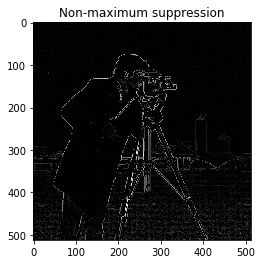

array([[  0.00000000e+00,   4.49285854e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.56770038e-14],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   6.76875699e-14],
       [  3.78031959e+00,   0.00000000e+00,   4.35147463e+00, ...,
          2.15511375e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   8.67210587e+00,   0.00000000e+00, ...,
          2.19168898e+01,   0.00000000e+00,   3.40753403e+00],
       [  0.00000000e+00,   5.97721009e+00,   0.00000000e+00, ...,
          2.03225143e+01,   0.00000000e+00,   2.39088404e+00],
       [  2.39088404e+00,   5.97721009e+00,   3.58632605e+00, ...,
          2.03225143e+01,   1.19544202e+01,   2.39088404e+00]])

In [307]:
def non_maximum_suppression():
    sobel_mag_nms=sobel_mag
    sobel_dir_nms=sobel_dir
    x,y = np.shape(sobel_dir_nms)
    
    # Angle quantization
    x0,y0 = np.where(((sobel_dir_nms<22.5)+(sobel_dir_nms>157.5)*(sobel_dir_nms<202.5)+(sobel_dir_nms>337.5)) == True)
    sobel_dir_nms[x0,y0] = 0
    x90,y90 = np.where(((sobel_dir_nms>67.5)*(sobel_dir_nms<112.5)+(sobel_dir_nms>247.5)*(sobel_dir_nms<292.5)) == True)
    sobel_dir_nms[x90,y90] = 90
    x45,y45 = np.where(((sobel_dir_nms>22.5)*(sobel_dir_nms<67.5)+(sobel_dir_nms>202.5)*(sobel_dir_nms<247.5)) == True)
    sobel_dir_nms[x45,y45] = 45
    x135,y135 = np.where(((sobel_dir_nms>112.5)*(sobel_dir_nms<157.5)+(sobel_dir_nms>292.5)*(sobel_dir_nms<337.5)) == True)
    sobel_dir_nms[x135,y135] = 135
    
    #checking the magnitude
    for i in range(x-1):
        for j in range(y-1):
            
                if sobel_dir_nms[i,j] == 0:
                    if not (sobel_mag_nms[i,j] >  sobel_mag_nms[i+1,j] and sobel_mag_nms[i,j] > sobel_mag_nms[i-1,j]):
                        sobel_mag_nms[i,j] = 0
                elif sobel_dir_nms[i,j] == 90:
                    if not (sobel_mag_nms[i,j] >  sobel_mag_nms[i,j+1] and sobel_mag_nms[i,j] > sobel_mag_nms[i,j-1]):
                        sobel_mag_nms[i,j] = 0
                elif sobel_dir_nms[i,j] == 45:
                    if not (sobel_mag_nms[i,j] >  sobel_mag_nms[i-1,j+1] and sobel_mag_nms[i,j] > sobel_mag_nms[i+1,j-1]):
                        sobel_mag_nms[i,j] = 0
                elif sobel_dir_nms[i,j] == 135:
                    if not (sobel_mag_nms[i,j] >  sobel_mag_nms[i-1,j-1] and sobel_mag_nms[i,j] > sobel_mag_nms[i+1,j+1]):
                        sobel_mag_nms[i,j] = 0
    
    #global non_max_suppressed 
    #non_max_suppressed = sobel_mag
    X, Y = np.meshgrid(np.arange(0, 500), np.arange(0, 500))
    u =  sobel_mag_nms*np.cos(sobel_dir_absolute)
    v =  sobel_mag_nms*np.sin(sobel_dir_absolute) 
    #plt.figure(figsize=(10,10))    
    #direction_gradient = plt.quiver(X,Y,u,v)
    
    global non_max_suppressed
    non_max_suppressed = sobel_mag_nms
    plt.imshow(sobel_mag_nms,cmap=plt.cm.gray)
    plt.title("Non-maximum suppression")
    plt.show()
    #print(sobel_mag_nms)
    return sobel_mag_nms

non_maximum_suppression()  

Double Thresholding

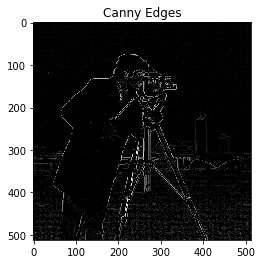

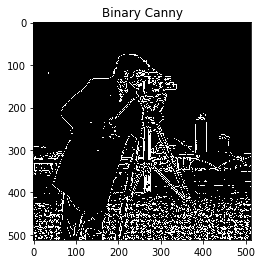

In [308]:
def double_threshold(image,high_thres, low_thres,threshold):

    i,j = np.shape(image)
    #i,j = np.where(image<thres_range[1])
    #image_high_edges = image
    #image_low_edges = image
    #print (image)
       
    
    x_high, y_high = np.where((image>high_thres)==True)   # points greator than higher threshold
    
    x_low, y_low = np.where((image<low_thres)==True)     #points lower than lower threshold
    image[x_low,y_low] = 0
    
    x_mid, y_mid = np.where(((image<high_thres) * (image>low_thres)== True))   #points between thresholds
    
    
    for X in range(i-1):
        for Y in range(j-1):
            if (np.abs(image[X,Y]) > high_thres):
                image[X,Y] = image[X,Y]
            elif (np.abs(image[X,Y]) < low_thres):
                image[X,Y] = 0  
            else:
                if (image[X-1,Y]>high_thres or image[X+1,Y]>high_thres or image[X,Y-1]>high_thres 
                or image[X,Y+1]>high_thres or image[X+1,Y+1]>high_thres or image[X+1,Y-1]>high_thres
                or image[X-1,Y+1]>high_thres or image[X-1,Y-1]>high_thres) :
                    image[X,Y] = image[X,Y]
                
    plt.imshow(image,cmap=plt.cm.gray)
    plt.title("Canny Edges")
    plt.show()
    #high_threshold_image = image_high_edges
    
    
    binarized_image=np.zeros(image.shape)
    binarized_image[image>=threshold]=1.0
    
    plt.imshow(binarized_image,cmap=plt.cm.gray)
    plt.title("Binary Canny")
    plt.show()
    
    #low_threshold_image = image_low_edges
    
    """fig1, axes_array = plt.subplots(1,2)
    fig1.set_size_inches(8,4)
    image_plot = axes_array[0].imshow(image ,cmap=plt.cm.gray) # Show the original image
    axes_array[0].axis('off')
    axes_array[0].set(title='High Threshold Edges')
    
    
    image_plot = axes_array[1].imshow(non_max_suppressed,cmap=plt.cm.gray) # Show the filtered image
    axes_array[1].axis('off')
    axes_array[1].set(title='Edges')
    plt.show()
    """
    
current_image=non_max_suppressed

interact(double_threshold,image=fixed(current_image),
         high_thres=FloatSlider(min=0.2, max=100., step=0.05,value=5.,continuous_update=False),
         low_thres=FloatSlider(min=0.1, max=100., step=0.05,value=2.5,continuous_update=False),
         threshold=FloatSlider(min=0.1, max=100.0, step=0.05,value=20.,continuous_update=False,description='Threshold for Binarization'));


References: 
1. http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARBLE/low/edges/gradient.htm
2. http://www-scf.usc.edu/~boqinggo/Canny.htm   
3. https://en.wikipedia.org/wiki/Canny_edge_detector#Development_of_the_Canny_algorithm
4. https://cyroforge.wordpress.com/canny-edge-detection/